<a href="https://colab.research.google.com/github/ElizabethOdelade/Evaluating-the-Impact-of-Marketing-Campaigns/blob/main/Module_5_Marketing_Campaigns_Imapact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Evaluating the Impact of Marketing Campaigns

In a fast paced world like we experience daily, every company seeks one means of the other to maintain profitability and gain quantifiable market share. For marketing companies they focus on consistently running successful campaigns in a complex and competitive market.

For this to be possible, they set up on A/B testing systems, a randomized experimentation method that involves presenting different versions of a variable (such as a web page, banner, or ad) to separate segments of the audience simultaneously. This approach helps determine which version has the most significant impact on business metrics.

To address these questions, the company conducted an A/B test, where the majority of participants were exposed to ads (the experimental group) and a smaller portion saw a Public Service Announcement (PSA) or nothing (the control group).

About the Dataset
Feature	Description
Row Index	Row index
User ID	Unique identifier for each user
Test Group	Indicates whether the user was in the "ad" group (saw the advertisement) or the "psa" group (saw the public service announcement or nothing)
Converted	Indicates whether the user bought the product (True) or not (False)
Total Ads	The number of ads seen by the user
Most Ads Day	The day when the user saw the highest number of ads
Most Ads Hour	The hour of the day when the user saw the highest number of ads
The marketing data can be found here.

Objective
The primary objective of this case study is to perform hypothesis testing on the e-commerce dataset to compare different groups or features. Specifically, we aim to:

Analyze the experimental and control groups to determine if the ads were successful.

Estimate the potential revenue generated from the ads.

Assess the statistical significance of the differences between the groups using A/B testing techniques.



In [ ]:
#!pip install --upgrade statsmodels


In [ ]:
# import liabries
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from statsmodels.stats.proportions_ztest import proportion_ztest
from statsmodels.stats.proportion import proportions_ztest



In [ ]:
#load dataset
upload_file = files.upload()

Saving marketing_AB.csv to marketing_AB.csv


In [ ]:
# read dataset
data = pd.read_csv("marketing_AB.csv")
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [ ]:
data.drop(columns="Unnamed: 0", inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [ ]:
data.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [ ]:
# data inspection
print("The shape is: ", data.shape, "\n")
print("The sum of missing values are:","\n", data.isna().sum(), "\n")
print("Duplicated values:", data.duplicated().sum())

The shape is:  (588101, 6) 

The sum of missing values are: 
 user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64 

Duplicated values: 0


In [ ]:
columns_to_check= ['test group', 'converted', 'most ads day', 'most ads hour']

In [ ]:
# using function to check for value count on categorical values
def print_value_counts(data, columns):
  for col in columns:
    print(f"value count for",{col})
    counts=(data[col].value_counts())
    print(counts)
    print("-" * 40)

print_value_counts(data, columns_to_check)

value count for {'test group'}
test group
ad     564577
psa     23524
Name: count, dtype: int64
----------------------------------------
value count for {'converted'}
converted
False    573258
True      14843
Name: count, dtype: int64
----------------------------------------
value count for {'most ads day'}
most ads day
Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: count, dtype: int64
----------------------------------------
value count for {'most ads hour'}
most ads hour
13    47655
12    47298
11    46210
14    45648
15    44683
10    38939
16    37567
17    34988
18    32323
9     31004
19    30352
21    29976
20    28923
22    26432
23    20166
8     17627
7      6405
0      5536
2      5333
1      4802
3      2679
6      2068
5       765
4       722
Name: count, dtype: int64
----------------------------------------


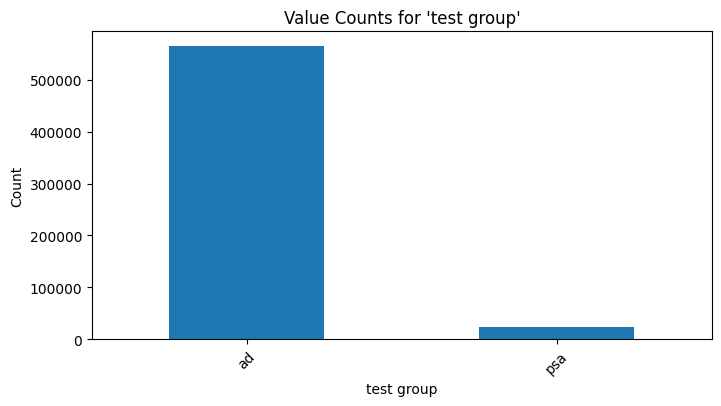

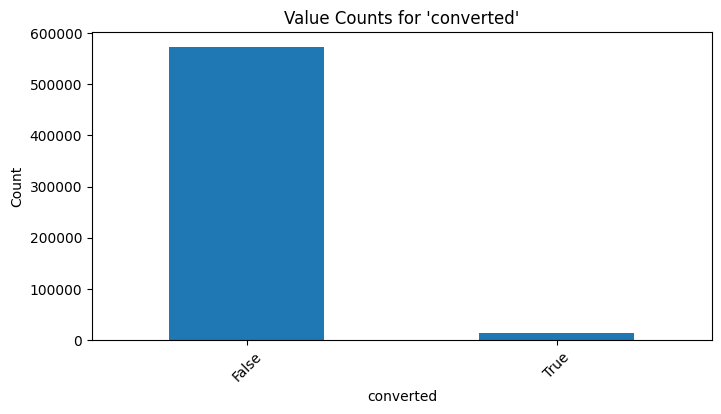

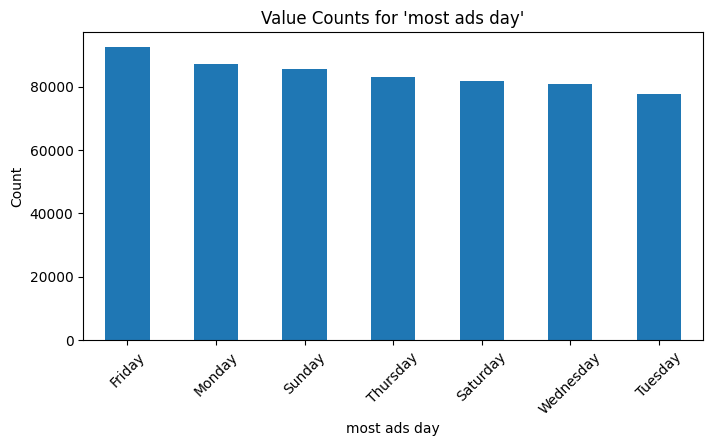

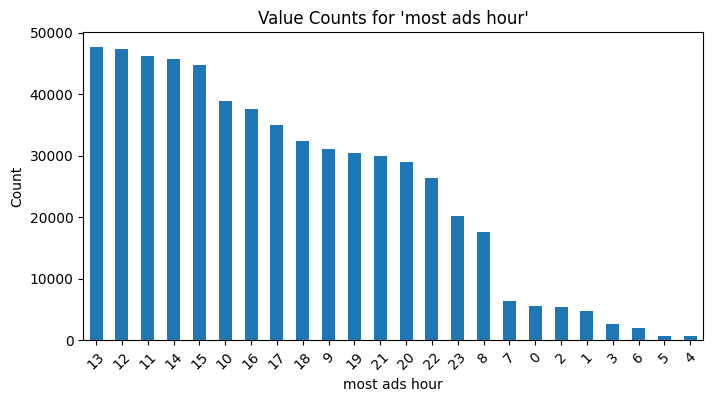

In [ ]:
# visualize the value counts on categorical columns
columns_to_plot = ['test group', 'converted', 'most ads day', 'most ads hour']

for col in columns_to_plot:
    counts = data[col].value_counts()  # get value counts
    counts.plot(kind='bar', figsize=(8,4), title=f"Value Counts for '{col}'")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # rotate x-axis labels for readability
    plt.show()

### Observations from Value Counts

•	The majority of users (564,577) were assigned to the "ad" test group, while a smaller segment (23,524) belonged to the "psa" control group, confirming the experimental design’s heavier weighting towards ad exposure.

•	Most users (573,258) did not convert (i.e., did not purchase), while only 14,843 users converted, indicating an overall low conversion rate within the dataset.

•	In terms of days, ad exposure was fairly evenly distributed throughout the week, with Friday (92,608) and Monday (87,073) having the highest counts of peak ad day impressions, and Tuesday (77,479) the lowest, suggesting some minor variation but consistent ad delivery across all days.

•	Peak ad exposure by hour predominantly occurs during typical daytime business hours, with the highest counts between 10 AM and 3 PM, specifically hour 13 (1 PM) with 47,655 users experiencing the most ads. Early morning (midnight to 6 AM) and very late hours have significantly fewer users seeing peak ads, matching general user activity patterns.

These distributions highlight how the experimental groups are structured, reinforce that most users were exposed to ads during daytime hours across all days of the week, and emphasize the challenge of achieving high conversion in the given campaign.


In [ ]:
data.describe()

,user id,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


### Observations from Data Summary  using describe() method

The dataset contains 588,101 complete records for each of the variables analyzed, indicating no missing data for user IDs, total ads seen, or peak ad hour attributes.

•	Users viewed, on average, about 25 ads each, but this number varies significantly; while half the users saw fewer than 13 ads, some outliers received up to 2,065 ads.

•	The peak hour when users saw the most ads predominantly falls between 11 AM and 6 PM, with an average around 2:30 PM, suggesting that the advertising exposure is concentrated in the early afternoon.

•	Such distribution insights regarding ad frequency and timing provide critical context for evaluating marketing performance and optimizing campaign schedules.


###  Calculate Conversion Rates by Group

In [ ]:
# Group by 'test group' and calculate total counts and conversions
summary = data.groupby('test group')['converted'].agg(['sum', 'count']).rename(columns={'sum': 'conversions', 'count': 'total_users'})
summary['conversion_rate'] = summary['conversions'] / summary['total_users']

print(summary)

#"""the above output shows that the conversion rate is low compare to the total users especially for the ad which is the experimental group."""


            conversions  total_users  conversion_rate
test group                                           
ad                14423       564577         0.025547
psa                 420        23524         0.017854


### Interpretation:
•	The conversion rates are low overall for both groups, with roughly 2.5% of users converting in the ad group and 1.8% in the PSA/control group.

•	Despite the low absolute conversion rates, the ad group’s conversion rate is higher than the control group’s by about 0.7 percentage points.

•	This suggests the advertising campaign likely had a positive effect on conversions, though only a small portion of users actually converted.


### Hypothesis

o	Null Hypothesis (H0): Ads have no impact on conversion rates (conversion rate in ad group = conversion rate in psa group).

o	Alternative Hypothesis (H1): Ads increase conversion rates (conversion rate in ad group > psa group).


In [ ]:
# Perform Two-Proportion Z-Test
# Test if conversion rate in ad group is significantly higher than in psa.

conversions = summary["conversions"].values
total_users = summary['total_users'].values

stat, p_value =proportions_ztest(count=conversions, nobs=total_users, alternative= "larger")
print(f"Z-statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

Z-statistic: 7.3701
P-value: 0.0000


In [ ]:
if p_value < 0.05:
    print("Reject null hypothesis: Ads significantly increased conversion rate.")
else:
    print("Fail to reject null hypothesis: No statistically significant impact of ads.")

Reject null hypothesis: Ads significantly increased conversion rate.


### Insight

The results of the two-proportion Z-test indicate that the ad campaign had a statistically significant impact on user conversions.

Z-statistic: 7.3701

P-value: 0.0000

Since the p-value is far less than the common significance level (e.g., α = 0.05), we reject the null hypothesis. This means:

The advertisement significantly increased the conversion rate compared to the control group.

This insight suggests that the ad campaign is effective and could be a valuable strategy for boosting user engagement or sales.

### Estimate the potential revenue generated from the ads.

Assume product price is  $50 , since the exact price was not given.

In [ ]:
#Assume product price = $50
# conversions counts for ad
conversions_counts =  data[data["test group"] == "ad"]["converted"].sum()
print(conversions_counts)
revenue = conversions_counts * 50
print(f"Estimated Revenue from Ads: ${revenue}")


14423
Estimated Revenue from Ads: $721150


In [ ]:
# conversions counts for psa
conversions_counts_psa =  data[data["test group"] == "psa"]["converted"].sum()
print(conversions_counts_psa)
revenue = conversions_counts_psa * 50
print(f"Estimated Revenue from psa: ${revenue}")

420
Estimated Revenue from psa: $21000


### Observation

The estimated potential revenue generated from the ad group amounts to $721150, assuming a product price of $50. This revenue is derived from the total number of users in the ad group who converted (i.e., made a purchase). The result suggests that the ad campaign had a direct and measurable financial impact on sales. If the conversion rate is statistically higher than that of the control group (PSA), then scaling the ad campaign could lead to even greater revenue generation.

#### Marketing Campaign Impact Analysis Summary

An A/B test was conducted to assess the impact of a marketing advertisement campaign. Users were divided into an experimental group (ads) and a control group (public service announcement or PSA).

A Z-test for proportions was used to evaluate the statistical difference in conversion rates between the two groups:

•	Z-statistic: 7.3701

•	P-value: 0.0000

This confirms that the ad group performed significantly better than the control group.

Assuming a product price of $50, we estimate the following:

•	Estimated Revenue from Ads: $721,150

•	Estimated Revenue from PSA group: $21,000

This strong performance highlights the campaign’s success and supports the case for broader implementation to maximize returns.


